In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import geopandas as gpd
import matplotlib.colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
from openpyxl import load_workbook
import xlrd

%matplotlib inline
fp = "maps\RUS_adm1.shp"
mo_gdf = gpd.read_file(fp)

fp = "maps\map.shp"
mo_gdf2 = gpd.read_file(fp)

In [2]:
mo_gdf = mo_gdf.append({'ID_1': 84, 'geometry': mo_gdf2.iloc[10].geometry, 'NAME_1': 'Crimea'}, ignore_index=True)

In [3]:
mo_gdf

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,188.0,RUS,Russia,1,Adygey,Respublika,Republic,Республика Адыгея,Adygea|Adygeya|Adygheya|Republic of Adygeya|Ad...,"POLYGON ((39.64794921874994 45.16419601440435,..."
1,188.0,RUS,Russia,2,Altay,Kray,Territory,Алтайский край,Altayskiy Kray,"POLYGON ((85.36115264892589 54.22598266601574,..."
2,188.0,RUS,Russia,3,Amur,Oblast,Region,Амурская область,Amurskaya Oblast,"POLYGON ((120.6742858886719 57.05606842041027,..."
3,188.0,RUS,Russia,4,Arkhangel'sk,Oblast,Region,Архангельская область,Arcangelo|Archangel|Archangelsk|Arkhangelskaya...,(POLYGON ((36.77239608764648 63.91510391235352...
4,188.0,RUS,Russia,5,Astrakhan',Oblast,Region,Астраханская область,Astrachan|Astrakhanskaya Oblast,"POLYGON ((46.58406066894548 48.61551284790045,..."
5,188.0,RUS,Russia,6,Bashkortostan,Respublika,Republic,Республика Башкортостан,Bashkir|Bashkiriya|Bashkirskaya A.S.S.R.|Repub...,"POLYGON ((54.86350631713879 56.4574546813966, ..."
6,188.0,RUS,Russia,7,Belgorod,Oblast,Region,Белгородская область,Belgorodskaya Oblast,"POLYGON ((38.10826492309587 51.38651275634777,..."
7,188.0,RUS,Russia,8,Bryansk,Oblast,Region,Брянская область,Bryanskaya Oblast,"POLYGON ((33.83618927001959 53.97200775146484,..."
8,188.0,RUS,Russia,9,Buryat,Respublika,Republic,Республика Бурятия,Buryatiya|Buryat-Mongol A.S.S.R.|Republic of B...,"POLYGON ((116.1044845581057 57.23717498779297,..."
9,188.0,RUS,Russia,10,Chechnya,Respublika,Republic,Республика Чечено-Ингушска,Cecenia|Chechenia|Chechênia|Tchetchnia|Chechen...,"POLYGON ((46.57887649536156 43.8440208435058, ..."


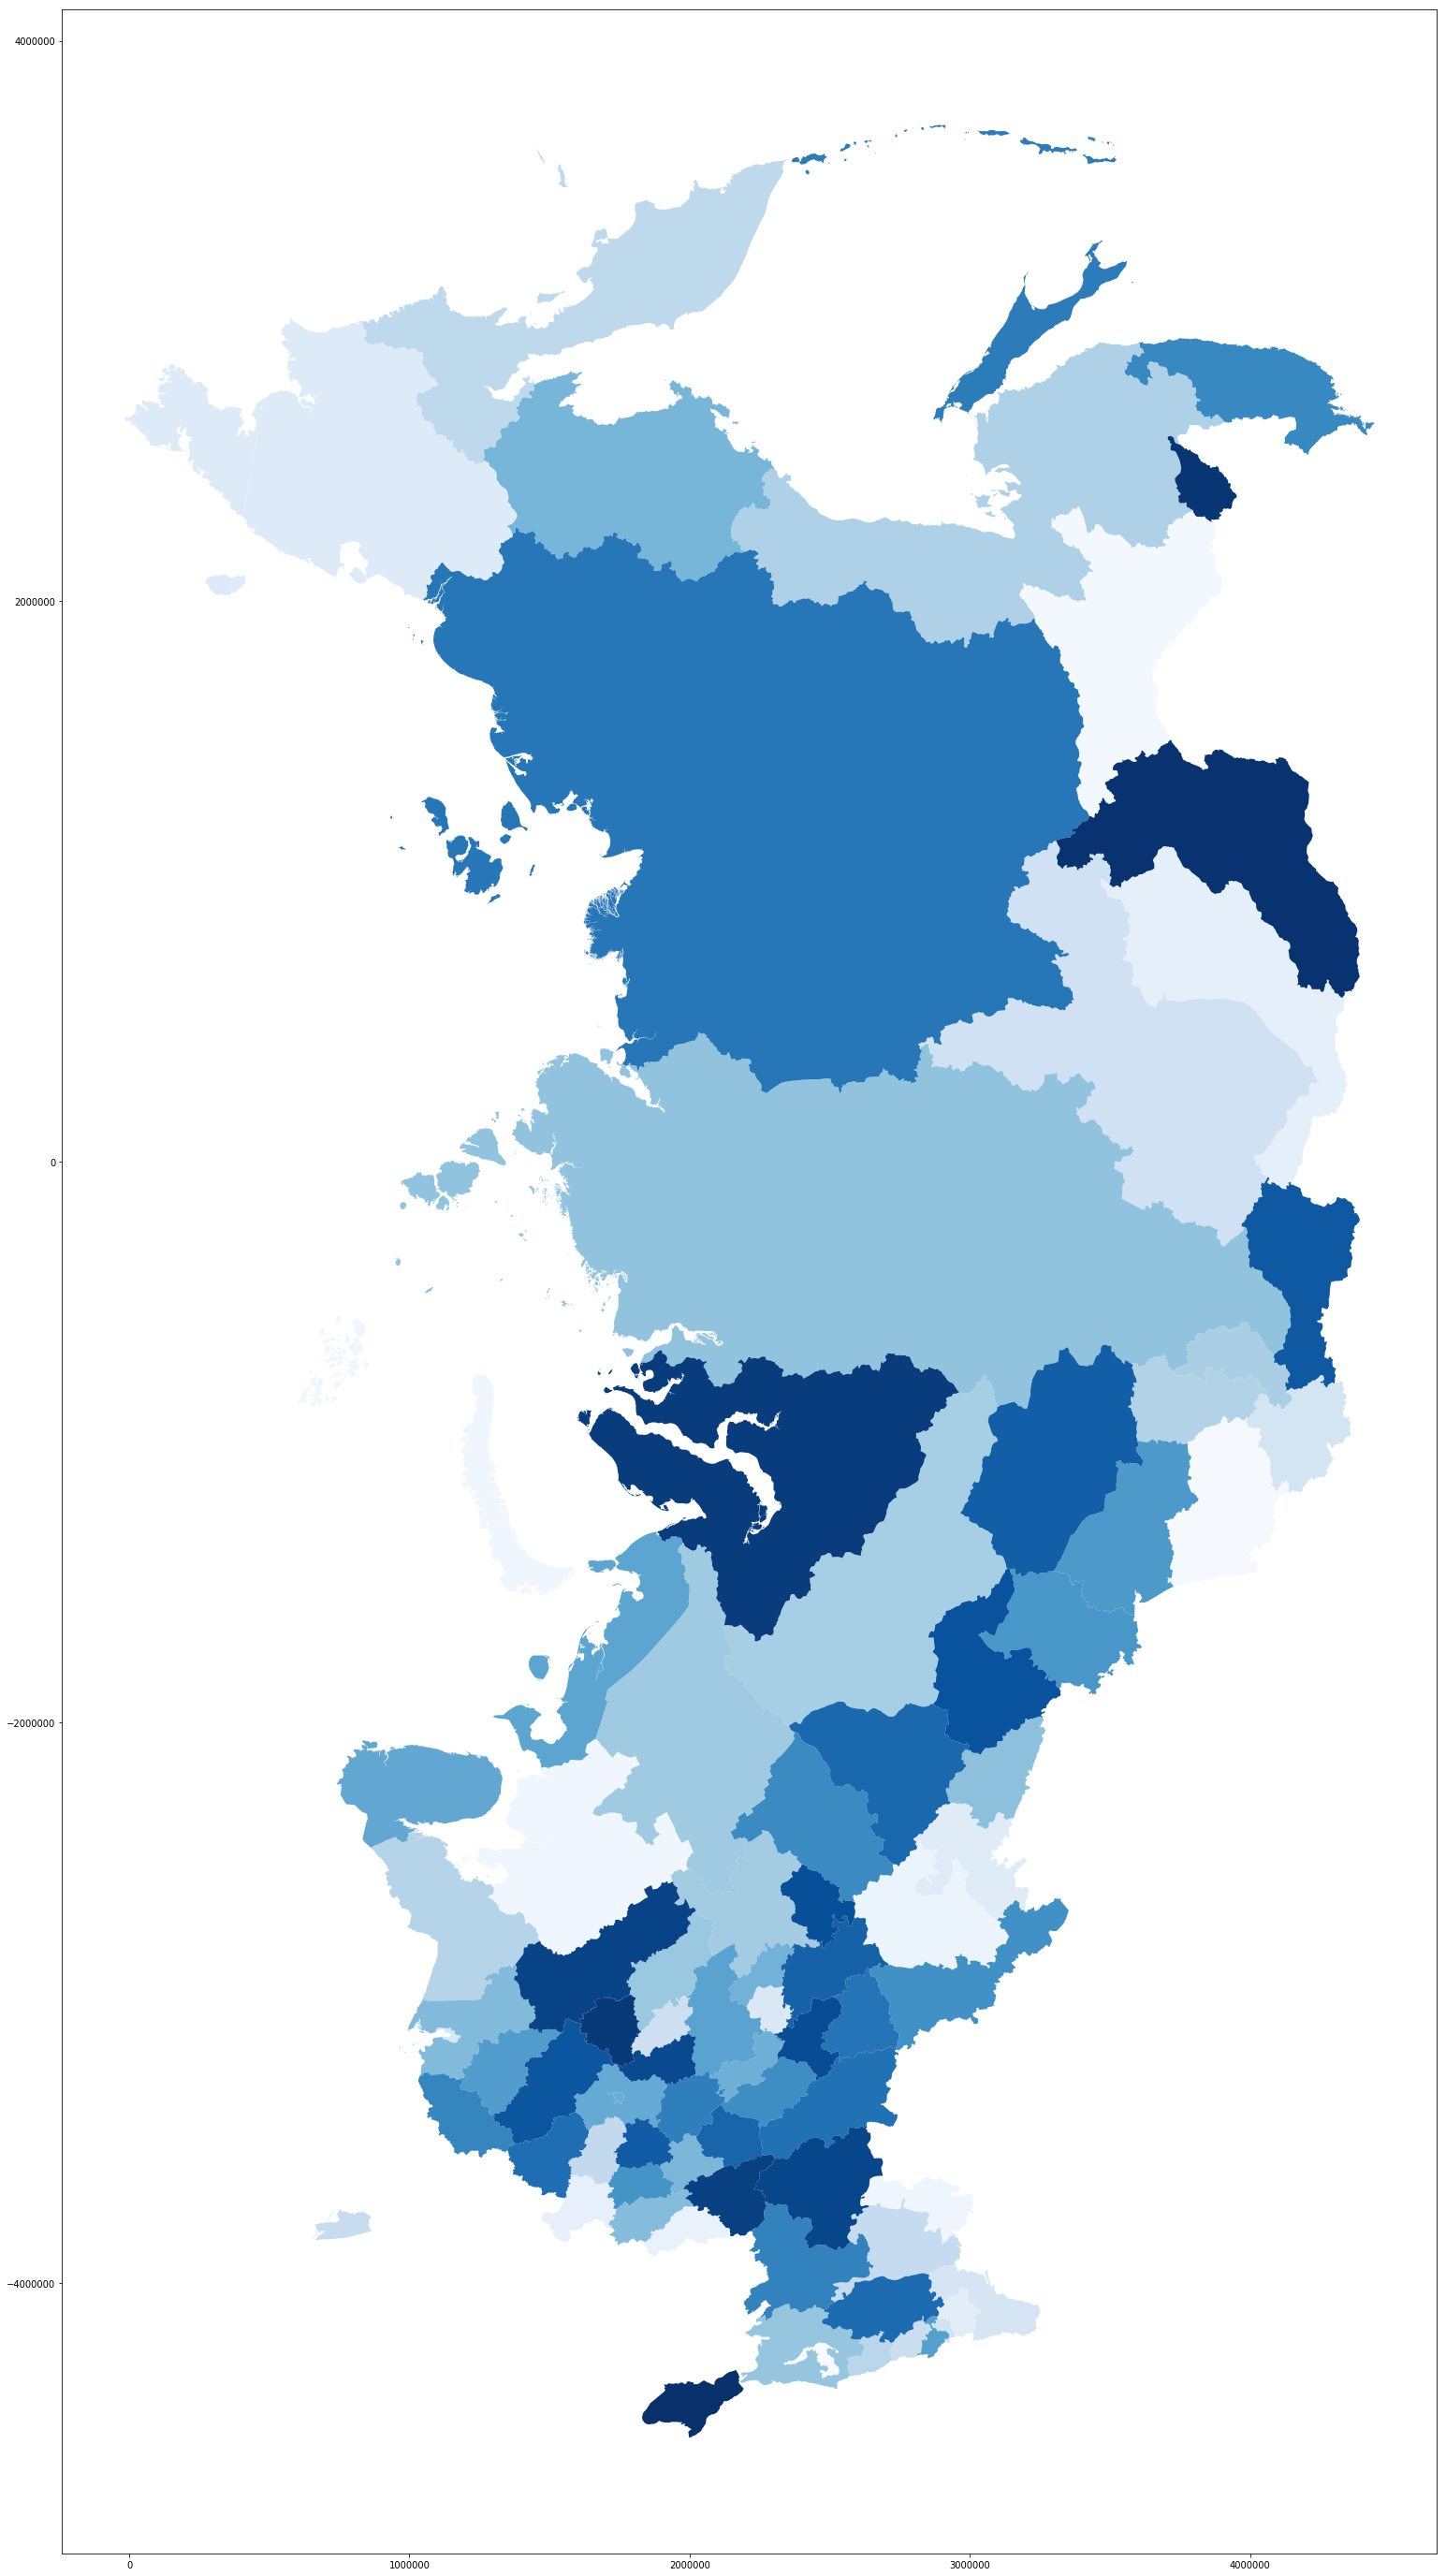

In [4]:
mo_gdf_wm = mo_gdf.to_crs({'init' :'epsg:3575'}) 
#mo_gdf_wm.plot()

mo_gdf_wm.plot(column='ID_1',linewidth=0.5,cmap='Blues', legend=False, figsize=[50,50])

In [6]:

ACTION1_File = load_workbook('map.xlsx', )
clust = ACTION1_File.get_sheet_by_name('clust')
name = ACTION1_File.get_sheet_by_name('map name')
label = [cell[0].value for cell in name.iter_rows()][0]

wb = xlrd.open_workbook('map.xlsx')
sh = wb.sheet_by_name('regions')

Labels = sh.row_values(0, start_colx=0, end_colx=None)
Data = [[sh.cell_value(r,c) for c in range(sh.ncols)] for r in range(1,sh.nrows)]

df = pd.DataFrame(Data,columns=Labels)

color = []
legend_dict = {}
settings = []

for line in clust.iter_rows(row_offset=1):
    if line[0].value != None:
        
        rgb = line[2].fill.fgColor.index[2:]
        a = line[2].fill.fgColor.index[:2]
        color.append(str('#'+rgb+a))
        
        settings.append({"Clust": line[0].value, "Label": (line[1].value), "Color": str('#'+rgb+a), "Hatch": (line[3].value)})
        
        #legend_dict.update({str(line[1].value): str('#'+rgb+a)})
        
df.iloc[df.loc[df['Show on map'] == 0].Clust.index, 2] = ''
for key in settings:
    if key['Label'] == None:
        key['Label'] = ''
        
mo_gdf["clustrs"] = df.Clust

C:\Users\ccord517\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  """
C:\Users\ccord517\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  


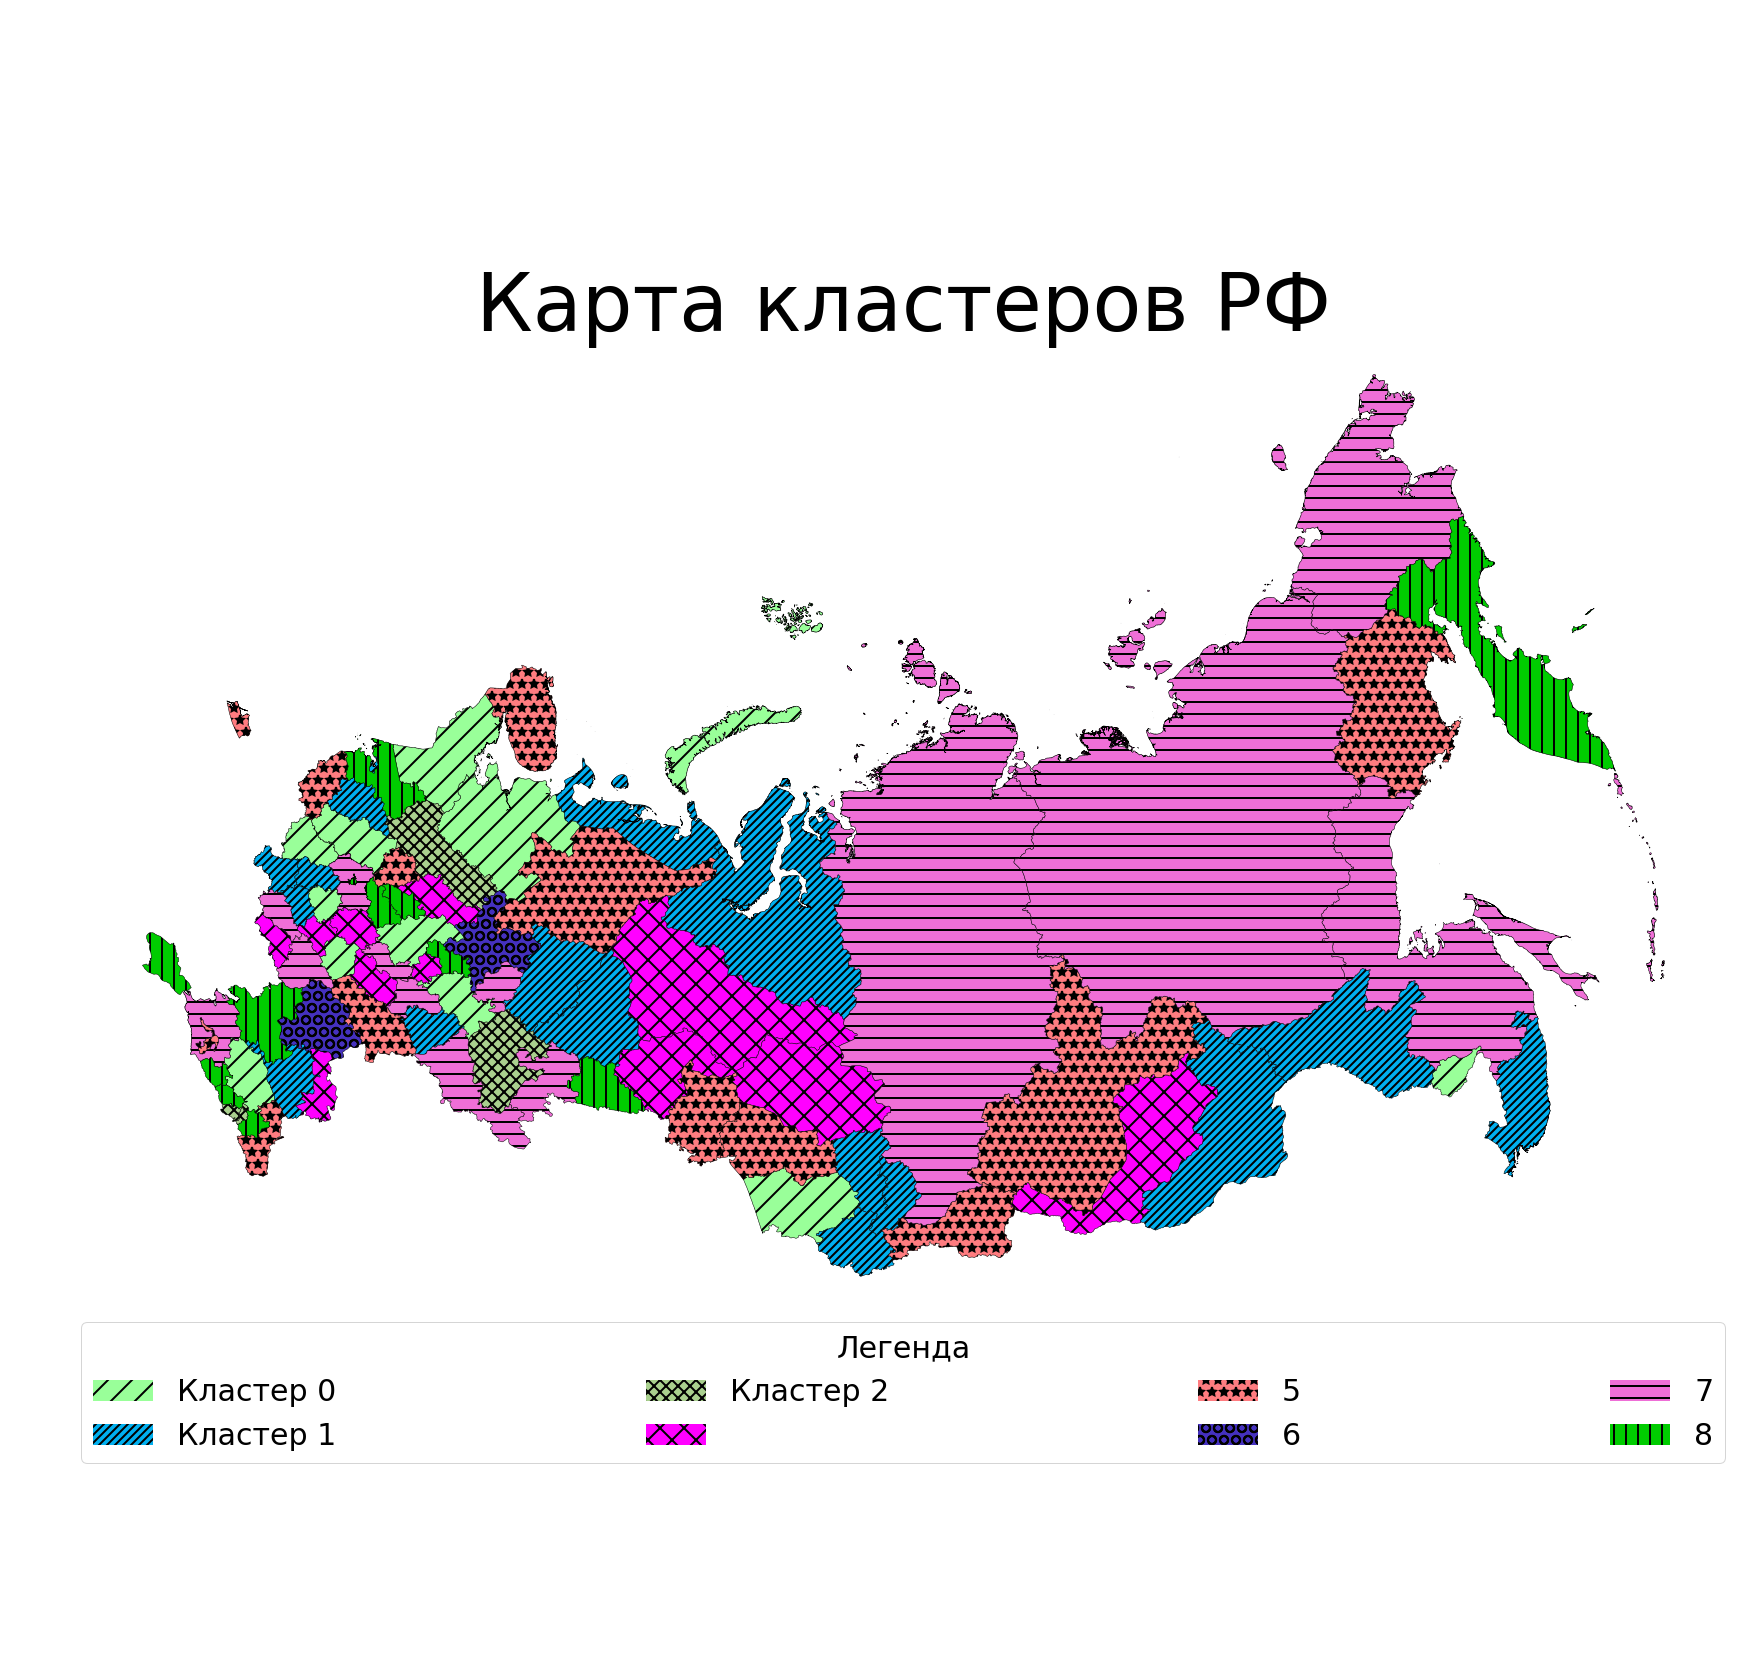

In [7]:
patchList = []
for key in settings:
    data_key = mpatches.Patch(facecolor=key['Color'], label=key['Label'], hatch=key['Hatch'])
    patchList.append(data_key)
    
cmap = matplotlib.colors.ListedColormap([x['Color'] for x in settings])

bounds = np.arange(len([x['Color'] for x in settings])+1)

norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize  = (30, 30))

for key in settings:
    
    kwarg3s = {'facecolor': key['Color'], 'edgecolor': 'black', 'linewidth': 0.5, 'hatch': key['Hatch']}

    clust1 = mo_gdf[mo_gdf.clustrs == key['Clust']]

    clust1 = clust1.to_crs({'init' :'epsg:3576'})

    clust1.plot(zorder=11, ax=ax, **kwarg3s)
    
matplotlib.rc('hatch', linewidth=2) # размер штриховки

leg = ax.legend(title="Легенда", handles=patchList, fontsize=30, loc='lower center',mode="expand", ncol = 4, bbox_to_anchor=(0., 0.1, 1., 0.))
leg.set_title("Легенда", prop={'size':30})

ax.set_title(label, fontsize=80, y=0.8)
ax.set_axis_off()
plt.axis('equal');

In [9]:
if (input('Сохранить картинку? y/n ') in ['y', 'Y', 'yes', 'YES', 'да', 'Да']):
    namepng = input('Введите название для сохранения ')

    fig.savefig('%s.png'%(namepng))
    print("Карта сохранена")
else:
    print("Не сохранено")

Сохранить картинку? y/n да
Введите название для сохранения 777
Карта сохранена
